# Wyscout Events Data Loading
### Loris

In [12]:
import pandas as pd
import json
from IPython.display import display
import zipfile
from pathlib import Path
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# specfic soccer analysis packages
from mplsoccer import Pitch

# load custom functions
from src.visualization import *
from src.dataloader import dataloader




### Load Datas

In [13]:
# Load Data from Slovenia-Danemark November 20, 2023
match_id = "5414260"
df_events = dataloader(match_id)
# df_events.columns


In [14]:
df_events['type.primary'].unique()
# important for Loris
# 'duel', 'interception', 'throw_in', 'corner', 'shot', 'shot_against','offside',  'infraction', 'clearance','goalkeeper_exit'


array(['pass', 'duel', 'game_interruption', 'throw_in', 'interception',
       'infraction', 'free_kick', 'touch', 'goal_kick', 'shot',
       'clearance', 'offside', 'fairplay', 'corner', 'penalty',
       'shot_against', 'acceleration', 'goalkeeper_exit'], dtype=object)

In [15]:
df_names = ['player.id','player.name','player.position','team.name','opponentTeam.name','team.formation',\
    'opponentTeam.formation''possession.team.id','possession.team.name','possession.team.formation',\
    'aerialDuel.opponent.id', 'aerialDuel.opponent.name','aerialDuel.opponent.position', 'aerialDuel.opponent.height',\
    'aerialDuel.firstTouch', 'aerialDuel.height','aerialDuel.relatedDuelId', 'carry.progression', 'carry.endLocation.x',\
    'carry.endLocation.y', 'groundDuel.opponent.id','groundDuel.opponent.name', 'groundDuel.opponent.position',\
    'groundDuel.duelType', 'groundDuel.keptPossession','groundDuel.progressedWithBall', 'groundDuel.stoppedProgress',\
    'groundDuel.recoveredPossession', 'groundDuel.takeOn','groundDuel.side', 'groundDuel.relatedDuelId','possession','shot.goalkeeperActionId',
    'shot.goalkeeper.id', 'shot.goalkeeper.name', 'shot.goalkeeper','location','matchPeriod', 'minute', 'second']

## 4.3 Duel performance of the players

How to do:
- analyse the duel data
- duels lost/won: how much duel wins? Precentage?
- (Data:'groundDuel.opponent.id','groundDuel.opponent.name', 'groundDuel.opponent.position',\
    'groundDuel.duelType', 'groundDuel.keptPossession','groundDuel.progressedWithBall', 'groundDuel.stoppedProgress',\
    'groundDuel.recoveredPossession', 'groundDuel.takeOn','groundDuel.side', 'groundDuel.relatedDuelId')

In this section the duel performance of the players are analyzed. We take a look at the different duels, arial and ground duels and analyze the outcome of the duels for the different players.
In the first part the players with the most duels are listed for danemark and slovenia.

In [16]:
#df_events[[ 'aerialDuel.opponent.id', 'aerialDuel.opponent.name','aerialDuel.opponent.position', 'aerialDuel.opponent.height',\
#            'aerialDuel.firstTouch', 'aerialDuel.height','aerialDuel.relatedDuelId']].head(11)

In [17]:
#df_events[[ 'carry.progression', 'carry.endLocation.x','carry.endLocation.y']].head(11)

In [18]:
#df_events[[ 'groundDuel.opponent.id','groundDuel.opponent.name', 'groundDuel.opponent.position',\
#            'groundDuel.duelType', 'groundDuel.keptPossession','groundDuel.progressedWithBall', 'groundDuel.stoppedProgress',\
#            'groundDuel.recoveredPossession', 'groundDuel.takeOn','groundDuel.side', 'groundDuel.relatedDuelId']].head(11)

In [19]:
#df_events[[ 'player.name','player.position','team.name','opponentTeam.name',"type.primary", "minute", "second"]].head(11)

In [20]:
# duel events
df_duels = df_events[df_events['type.primary'] == 'duel']

# defensive duels slovenia
df_dduels_svn = df_duels[(df_duels['team.name'] == 'Slovenia') & (df_duels["groundDuel.duelType"] == "defensive_duel")]
dduels_svn = df_dduels_svn.shape[0]

# defensive duels denmark
df_dduels_dnk = df_duels[(df_duels['team.name'] == 'Finland') & (df_duels["groundDuel.duelType"] == "defensive_duel")]
dduels_dnk = df_dduels_dnk.shape[0]

# Display data
#print(f"Defense duels Slovenia: {dduels_svn} Total defensive duels")
#display(df_dduels_svn)
#print(f"Defense duels Denmark: {dduels_dnk} Total defensive duels")
#display(df_dduels_dnk)

In [21]:
df_dduels_svn[[ 'player.name','player.position','team.name',"matchPeriod", "minute", "second"]].head(5)

,player.name,player.position,team.name,matchPeriod,minute,second
40,P. Stojanović,RW,Slovenia,1H,1,49
50,M. Blažič,RCB,Slovenia,1H,2,24
71,NaN,NaN,Slovenia,1H,3,15
112,T. Elšnik,LCMF,Slovenia,1H,5,28
128,P. Stojanović,RW,Slovenia,1H,6,53


,total_duels,duels_won,percentage_won
player.name,,,
J. Uronen,10,5.0,50.0
L. Väisänen,9,7.0,78.0
A. Hoskonen,8,7.0,88.0
G. Kamara,8,5.0,62.0
N. Alho,5,3.0,60.0
B. Källman,4,1.0,25.0
R. Ivanov,4,3.0,75.0
M. Forss,4,2.0,50.0
K. Kairinen,3,1.0,33.0


IndexError: list index out of range

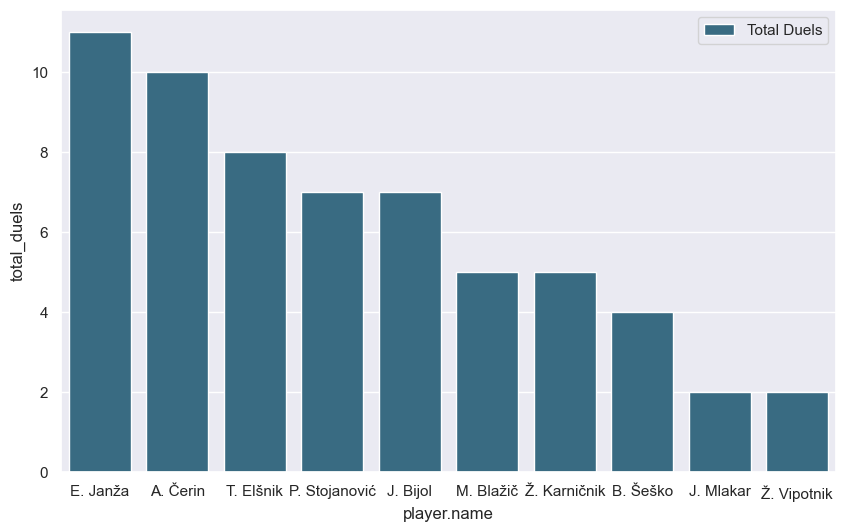

In [22]:
# get the players who had a duel in the game
df_dduels_svn_players = df_dduels_svn['player.name'].dropna().unique()
df_dduels_dnk_players = df_dduels_dnk['player.name'].dropna().unique()
#print("Player with duels Slovenia")
#display(df_dduels_svn_players)

# get the number of duel per player
df_dduels_svn_player_count = df_dduels_svn['player.name'].dropna().value_counts()
df_dduels_dnk_player_count = df_dduels_dnk['player.name'].dropna().value_counts()
#print("Number of Duels per Player Slovenia")
#display(df_dduels_svn_player_count)

# duels won per player
# get the duels that were won
df_dduelswon_svn = df_dduels_svn[df_dduels_svn['player.name'].notna() & ((df_dduels_svn["groundDuel.stoppedProgress"] == True) | (df_dduels_svn["groundDuel.recoveredPossession"] == True))]
df_dduelwon_svn_player_count = df_dduelswon_svn['player.name'].value_counts()
df_dduelswon_dnk = df_dduels_dnk[df_dduels_dnk['player.name'].notna() & ((df_dduels_dnk["groundDuel.stoppedProgress"] == True) | (df_dduels_dnk["groundDuel.recoveredPossession"] == True))]
df_dduelwon_dnk_player_count = df_dduelswon_dnk['player.name'].value_counts()
#print("Number of Duels per Player WON Slovenia")
#display(df_dduelwon_svn_player_count)

aligned_counts_svn = pd.concat([df_dduels_svn_player_count, df_dduelwon_svn_player_count], axis=1, keys=['total_duels', 'duels_won']).fillna(0)
aligned_counts_svn['percentage_won'] = ((aligned_counts_svn['duels_won']) / (aligned_counts_svn['total_duels']) * 100).round(0)
#display(aligned_counts_svn)
aligned_counts_dnk = pd.concat([df_dduels_dnk_player_count, df_dduelwon_dnk_player_count], axis=1, keys=['total_duels', 'duels_won']).fillna(0)
aligned_counts_dnk['percentage_won'] = ((aligned_counts_dnk['duels_won']) / (aligned_counts_dnk['total_duels']) * 100).round(0)
display(aligned_counts_dnk)

# -------------------------------------------------------------------------------------
# Plot 1 Slovenia
# Set Seaborn theme and color palette
sns.set_theme(style="darkgrid")
palette = sns.color_palette("viridis", len(aligned_counts_svn))

# Plotting the data using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))

# Plot total duels
sns.barplot(x=aligned_counts_svn.index, y=aligned_counts_svn['total_duels'], color=palette[3], label='Total Duels')

# Plot duels won
sns.barplot(x=aligned_counts_svn.index, y=aligned_counts_svn['duels_won'], color=palette[10], label='Duels Won')

# Adding labels and title
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Duel Performance per Player: Slovenia')
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend()

# Save plot to a specified path
save_path = 'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/duel_performance_svn_final_Slovenia4260.png'  # Specify your desired save path here
plt.tight_layout()
plt.savefig(save_path)

# -----------------------------------------------------------------------------------------------------------------------
# Plot 2 Denmark
# Set Seaborn theme and color palette
# -

# Plotting the data using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))

# Plot total duels
sns.barplot(x=aligned_counts_dnk.index, y=aligned_counts_dnk['total_duels'], color=palette[3], label='Total Duels')

# Plot duels won
sns.barplot(x=aligned_counts_dnk.index, y=aligned_counts_dnk['duels_won'], color=palette[10], label='Duels Won')

# Adding labels and title
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Duel Performance per Player: Denmark')
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend()

# Save plot to a specified path
save_path = 'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/duel_performance_dnk_final_Finland4260.png'  # Specify your desired save path here
plt.tight_layout()
plt.savefig(save_path)




# reorder the data according to most duels won percentage
aligned_counts_svn_sorted = aligned_counts_svn.sort_values(by='percentage_won', ascending=False)
aligned_counts_dnk_sorted = aligned_counts_dnk.sort_values(by='percentage_won', ascending=False)

# Plot 3 Slovenia Sorted Percentage
# ---------------------------------------------------------------------------------------
# Set Seaborn theme and color palette
# -

# Plotting the data using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))

# Plot percentage of duels won per player
sns.barplot(x=aligned_counts_svn_sorted.index, y=aligned_counts_svn_sorted['percentage_won'], color=palette[3])

# Adding labels and title
plt.xlabel('Player')
plt.ylabel('Percentage of Duels Won')
plt.title('Percentage of Duels Won per Player: Slovenia')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save plot to a specified path
save_path = 'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/duel_percentage_sorted_svn_final_Slovenia4260.png'  # Specify your desired save path here
plt.tight_layout()
plt.savefig(save_path)

# Plot 4 Denmark Sorted Percentage
# ---------------------------------------------------------------------------------------
# Set Seaborn theme and color palette
# - 

# Plotting the data using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))

# Plot percentage of duels won per player
sns.barplot(x=aligned_counts_dnk_sorted.index, y=aligned_counts_dnk_sorted['percentage_won'], color=palette[3])

# Adding labels and title
plt.xlabel('Player')
plt.ylabel('Percentage of Duels Won')
plt.title('Percentage of Duels Won per Player: Denmark')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save plot to a specified path
save_path = 'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/duel_percentage_sorted_dnk_final_Finland4260.png'  # Specify your desired save path here
plt.tight_layout()
plt.savefig(save_path)


# Show plot
plt.show()


## 4.4 Goal keeper behaviour

How to do:
- Shots on goal
- Shots on goal parried (Precentage)
- Passes from goal keeper

### 4.4.1 Shots parried by goalkeeper

In [30]:
df_events[["pass.height","pass.length","shot.bodyPart","shot.isGoal","shot.onTarget","shot.goalZone","shot.xg","shot.postShotXg",\
           "shot.goalkeeperActionId","shot.goalkeeper.id", "shot.goalkeeper.name", "shot.goalkeeper", \
            "type.primary", "minute", "second"]].head(10)

,pass.height,pass.length,shot.bodyPart,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper.id,shot.goalkeeper.name,shot.goalkeeper,type.primary,minute,second
0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pass,0,3
1,high,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pass,0,6
2,high,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,interception,0,10
3,high,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pass,0,13
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,duel,0,15
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,duel,0,15
6,high,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pass,0,17
7,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,interception,0,18
8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pass,0,20
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,duel,0,20


,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location
150,150,1854206266,5414302,1H,8,18,00:08:18.877,499.877529,NaN,NaN,...,False,True,gc,0.03368,0.04815,1.854207e+09,NaN,70273.0,J. Oblak,NaN
216,216,1854206338,5414302,1H,11,26,00:11:26.286,687.286810,NaN,NaN,...,False,True,gr,0.05706,0.25490,1.854208e+09,NaN,70273.0,J. Oblak,NaN
270,270,1854206398,5414302,1H,14,27,00:14:27.553,868.553394,NaN,NaN,...,False,True,gb,0.12640,0.11410,1.854208e+09,NaN,70273.0,J. Oblak,NaN
549,549,1854206690,5414302,1H,25,32,00:25:32.316,1533.316698,NaN,NaN,...,True,True,gbr,0.43130,0.57650,1.854208e+09,NaN,70273.0,J. Oblak,NaN
583,583,1854207824,5414302,1H,29,49,00:29:49.541,1790.541875,NaN,NaN,...,True,True,gtr,0.12480,0.37680,1.854207e+09,NaN,8480.0,K. Schmeichel,NaN
1007,1007,1854207283,5414302,2H,52,10,00:52:10.337,3269.337874,NaN,NaN,...,False,True,gl,0.16300,0.58910,1.854206e+09,NaN,70273.0,J. Oblak,NaN
1025,1025,1854207294,5414302,2H,53,34,00:53:34.357,3353.357076,NaN,NaN,...,True,True,gbr,0.23350,0.71950,1.854206e+09,NaN,70273.0,J. Oblak,NaN
1063,1063,1854207318,5414302,2H,57,44,00:57:44.359,3603.359262,NaN,NaN,...,False,True,gb,0.09653,0.05273,1.854206e+09,NaN,70273.0,J. Oblak,NaN
1433,1433,1854207715,5414302,2H,77,59,01:17:59.912,4818.912713,NaN,NaN,...,False,True,gtr,0.03093,0.48240,1.854207e+09,NaN,70273.0,J. Oblak,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1
0
1
0
2
0
2
0
1
Shot on target was freekick?
1
1
0


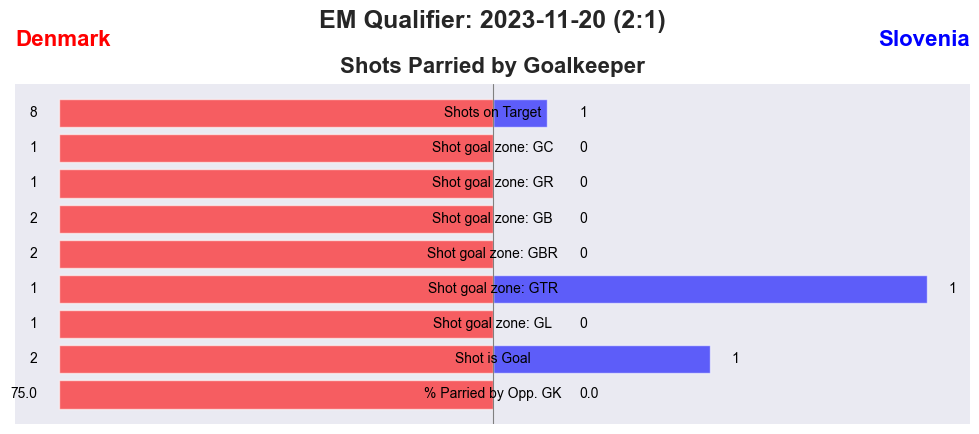

In [63]:
# Goalkeeper events: Shot on Target
df_goalkeeper = df_events[(df_events['shot.onTarget'] == True)]
display(df_goalkeeper)

# Shot on target from Denmark (In final version the goalkeeper is not hard coded)
df_ontarget_dnk = df_goalkeeper[(df_goalkeeper['shot.onTarget'] == True) & (df_goalkeeper['shot.goalkeeper.name'] == 'J. Oblak')]
df_ontarget_dnk_count = df_ontarget_dnk.shape[0]
#print("Shot on Target from Denmark")
#print(df_ontarget_dnk_count)

# Shot on target from Slovenia
df_ontarget_svn = df_goalkeeper[(df_goalkeeper['shot.onTarget'] == True) & (df_goalkeeper['shot.goalkeeper.name'] == 'K. Schmeichel')]
df_ontarget_svn_count = df_ontarget_svn.shape[0]
#print("Shot on Target from Slovenia")
#print(df_ontarget_svn_count)

# Shot is Goal Denmark
df_isgoal_dnk = df_goalkeeper[(df_goalkeeper['shot.isGoal'] == True) & (df_goalkeeper['shot.goalkeeper.name'] == 'J. Oblak')]
df_isgoal_dnk_count = df_isgoal_dnk.shape[0]
#print("Shot is Goal from Denmark")
#print(df_isgoal_dnk_count)

# Shot is Goal Slovenia
df_isgoal_svn = df_goalkeeper[(df_goalkeeper['shot.isGoal'] == True) & (df_goalkeeper['shot.goalkeeper.name'] == 'K. Schmeichel')]
df_isgoal_svn_count = df_isgoal_svn.shape[0]
#print("Shot is Goal from Slovenia")
#print(df_isgoal_svn_count)

# percentage parried K. Schmeichel
df_parried_dnk = 100 - (df_isgoal_svn_count / df_ontarget_svn_count * 100)
#print(df_parried_dnk)

# percentage parried J. Oblak
df_parried_svn = 100 - (df_isgoal_dnk_count / df_ontarget_dnk_count * 100)
#print(df_parried_svn)

# Goal zone Shots on target Denmark  GC
gc_dnk = df_ontarget_dnk[df_ontarget_dnk['shot.goalZone'] == 'gc'].shape[0]
print(gc_dnk)
# Goal zone Shots on target Slovenia  GC
gc_svn = df_ontarget_svn[df_ontarget_svn['shot.goalZone'] == 'gc'].shape[0]
print(gc_svn)

# Goal zone Shots on target Denmark  GR
gr_dnk = df_ontarget_dnk[df_ontarget_dnk['shot.goalZone'] == 'gr'].shape[0]
print(gr_dnk)
# Goal zone Shots on target Slovenia  GR
gr_svn = df_ontarget_svn[df_ontarget_svn['shot.goalZone'] == 'gr'].shape[0]
print(gr_svn)

# Goal zone Shots on target Denmark  GB
gb_dnk = df_ontarget_dnk[df_ontarget_dnk['shot.goalZone'] == 'gb'].shape[0]
print(gb_dnk)
# Goal zone Shots on target Slovenia  GB
gb_svn = df_ontarget_svn[df_ontarget_svn['shot.goalZone'] == 'gb'].shape[0]
print(gb_svn)

# Goal zone Shots on target Denmark  GBR
gbr_dnk = df_ontarget_dnk[df_ontarget_dnk['shot.goalZone'] == 'gbr'].shape[0]
print(gbr_dnk)
# Goal zone Shots on target Slovenia  GBR
gbr_svn = df_ontarget_svn[df_ontarget_svn['shot.goalZone'] == 'gbr'].shape[0]
print(gbr_svn)

# Goal zone Shots on target Denmark  GTR
gtr_dnk = df_ontarget_dnk[df_ontarget_dnk['shot.goalZone'] == 'gtr'].shape[0]
print(gtr_dnk)
# Goal zone Shots on target Slovenia  GTR
gtr_svn = df_ontarget_svn[(df_ontarget_svn['shot.goalZone'] == 'gtr') & (df_ontarget_svn['type.primary'] == 'free_kick')].shape[0]
print("Shot on target was freekick?")
print(gtr_svn)

# Goal zone Shots on target Denmark  GL
gl_dnk = df_ontarget_dnk[df_ontarget_dnk['shot.goalZone'] == 'gl'].shape[0]
print(gl_dnk)
# Goal zone Shots on target Slovenia  GL
gl_svn = df_ontarget_svn[df_ontarget_svn['shot.goalZone'] == 'gl'].shape[0]
print(gl_svn)

# Create Plots
# ------------------------------------------------------------------
dnk_data = {'Shots on Target': df_ontarget_dnk_count,
            'Shot goal zone: GC': gc_dnk,
            'Shot goal zone: GR': gr_dnk,
            'Shot goal zone: GB': gb_dnk,
            'Shot goal zone: GBR': gbr_dnk,
            'Shot goal zone: GTR': gtr_dnk,
            'Shot goal zone: GL': gl_dnk,
            'Shot is Goal': df_isgoal_dnk_count,
            '% Parried by Opp. GK': df_parried_svn,
            }
svn_data = {'Shots on Target': df_ontarget_svn_count,
            'Shot goal zone: GC': gc_svn,
            'Shot goal zone: GR': gr_svn,
            'Shot goal zone: GB': gb_svn,
            'Shot goal zone: GBR': gbr_svn,
            'Shot goal zone: GTR': gtr_svn,
            'Shot goal zone: GL': gl_svn,
            'Shot is Goal': df_isgoal_svn_count,
            '% Parried by Opp. GK': df_parried_dnk,
            }

perc_categories = []

plot_stats_barchart(svn_data, dnk_data, team1_name='Slovenia', team2_name='Denmark', perc_categories=perc_categories, title='EM Qualifier: 2023-11-20 (2:1)',
                    subtitle='Shots Parried by Goalkeeper', team1_color='blue', team2_color='red',saveplt=True, savepath='C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/Shots_parried.png')


### 4.4.2 Passes Played by Goalkeeper

Passes: K. Schmeichel Denmark

In [33]:
passes_goalkeeper_dnk = df_events[(df_events['type.primary'] == 'pass') & (df_events['player.name'] == 'K. Schmeichel')].shape[0]
print(passes_goalkeeper_dnk)
long_high_passes_goalkeeper_dnk = df_events[(df_events['type.primary'] == 'pass') & (df_events['player.name'] == 'K. Schmeichel') & (df_events['pass.length'] >= 40) & (df_events['pass.height'] == 'high')].shape[0]
print(long_high_passes_goalkeeper_dnk)

24
10


Passes: J. Oblak Slovenia

In [32]:
passes_goalkeeper_svn = df_events[(df_events['type.primary'] == 'pass') & (df_events['player.name'] == 'J. Oblak')].shape[0]
print(passes_goalkeeper_svn)
long_high_passes_goalkeeper_svn = df_events[(df_events['type.primary'] == 'pass') & (df_events['player.name'] == 'J. Oblak') & (df_events['pass.length'] >= 40) & (df_events['pass.height'] == 'high')].shape[0]
print(long_high_passes_goalkeeper_svn)

18
5


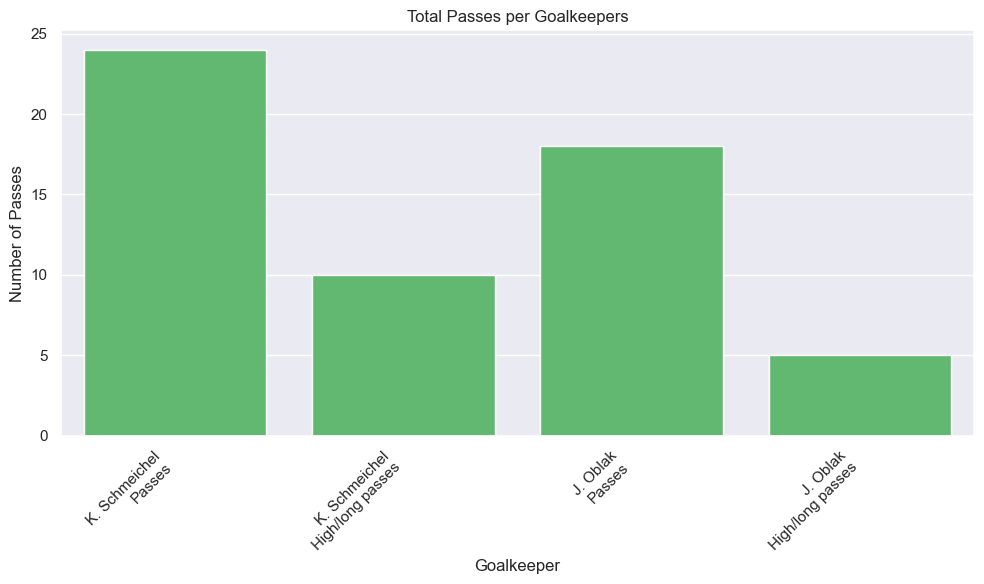

In [40]:
# Plot Data

# 1 Prepare Data
# Create dataframe for goalkeeper name and passes played
df_passes_gk = pd.DataFrame(columns=['name', 'passes'])

# Assign names
df_passes_gk.at[0, 'name'] = 'K. Schmeichel passes'
df_passes_gk.at[1, 'name'] = 'K. Schmeichel high/long passes'
df_passes_gk.at[2, 'name'] = 'J. Oblak passes'
df_passes_gk.at[3, 'name'] = 'J. Oblak high/long passes'


# Assign calculated passes
df_passes_gk.at[0, 'passes'] = passes_goalkeeper_dnk
df_passes_gk.at[1, 'passes'] = long_high_passes_goalkeeper_dnk
df_passes_gk.at[2, 'passes'] = passes_goalkeeper_svn
df_passes_gk.at[3, 'passes'] = long_high_passes_goalkeeper_svn

# 2 Plot Data
# Set Seaborn theme and color palette
sns.set_theme(style="darkgrid")
# palette = sns.color_palette("viridis", len(df_passes_gk))
palette = sns.color_palette("viridis", len(aligned_counts_svn))

# Plotting the data using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))

# Plot percentage of duels won per player
sns.barplot(x='name', y='passes', data=df_passes_gk, color=palette[10])

ax = sns.barplot(x='name', y='passes', data=df_passes_gk, color=palette[10])
# Adding labels and title
plt.xlabel('Goalkeeper')
plt.ylabel('Number of Passes')


In [ ]:
plt.title('Total Passes per Goalkeepers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Customize x-axis labels
ax.set_xticklabels(['K. Schmeichel\nPasses', 'K. Schmeichel\nHigh/long passes', 'J. Oblak\nPasses', 'J. Oblak\nHigh/long passes'])

# Save plot to a specified path
save_path = 'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/goalkeeper_passes_final.png'  # Specify your desired save path here
plt.tight_layout()
plt.savefig(save_path)


# Show plot
plt.show()